In [2]:
import os, random, shutil
import numpy as np
import pandas as pd
import PIL
#import keras
import itertools
from PIL import Image

import tensorflow as tf

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
#from skimage import feature, data, io, measure
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
%matplotlib inline 

import cv2
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dropout, Flatten, Conv2D, MaxPooling2D, Dense, Activation
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.layers import BatchNormalization
#from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.callbacks import TensorBoard
import io
import time
import datetime
from tensorflow.keras.optimizers import Adam,Adadelta
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
batch_size_train = 25
num_classes= 3
IMAGE_SIZE=[200,200]
classes_required = ['MIDDLE','OLD','YOUNG']

In [8]:
datagen = ImageDataGenerator(rescale=1.0/255.0)

train_path = (r'C:\1eye')
train_batches = datagen.flow_from_directory(train_path, target_size=(200,200), classes=classes_required, batch_size=batch_size_train)

Found 6872 images belonging to 3 classes.


In [9]:
model=Sequential()
model.add(Conv2D(16,kernel_size=(3,3), activation="relu" ,input_shape=IMAGE_SIZE + [3], padding='same'))

model.add(Conv2D(32, kernel_size=(3,3), activation="relu",padding='same'))
model.add(BatchNormalization()) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.30))

model.add(Conv2D(64, kernel_size=(3,3), activation="relu",padding='same'))
#model.add(BatchNormalization()) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.35))

model.add(Conv2D(128, kernel_size=(3,3), activation="relu",padding='same'))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization()) 
model.add(Dropout(0.45))

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))

In [10]:
opt = Adadelta(learning_rate=0.0001, decay=1e-6)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit_generator(train_batches, steps_per_epoch=50, epochs=100, verbose=1)

C:\Users\chintham\AppData\Local\Temp\ipykernel_22072\333046337.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_batches, steps_per_epoch=50, epochs=100, verbose=1)


Epoch 1/100
50/50 [==============================] - 53s 1s/step - loss: 1.6733 - accuracy: 0.3384
Epoch 2/100
50/50 [==============================] - 49s 980ms/step - loss: 1.7230 - accuracy: 0.3224
Epoch 3/100
50/50 [==============================] - 48s 947ms/step - loss: 1.6084 - accuracy: 0.3448
Epoch 4/100
50/50 [==============================] - 47s 938ms/step - loss: 1.6560 - accuracy: 0.3400
Epoch 5/100
50/50 [==============================] - 47s 934ms/step - loss: 1.6373 - accuracy: 0.3392
Epoch 6/100
50/50 [==============================] - 46s 912ms/step - loss: 1.5817 - accuracy: 0.3448
Epoch 7/100
50/50 [==============================] - 46s 909ms/step - loss: 1.5313 - accuracy: 0.3624
Epoch 8/100
50/50 [==============================] - 48s 952ms/step - loss: 1.6111 - accuracy: 0.3352
Epoch 9/100
50/50 [==============================] - 51s 1s/step - loss: 1.5835 - accuracy: 0.3416
Epoch 10/100
50/50 [==============================] - 49s 980ms/step - loss: 1.5367 - ac

In [12]:
model.save("model_final_Age1.h5")
print("saved model to disk")

saved model to disk


In [4]:
from tensorflow.keras.models import load_model
model_loaded = load_model('model_final_Age1.h5')

In [12]:
#test_image=cv2.imread(r'C:\1eye\test\0.jpg')
#test_image1 = np.array(Image.open(r'C:\1eye\test\9.jpg').resize((200, 200)))
#test_image1 = np.array(test_image).resize((200, 200))
#test_image1 = np.expand_dims(test_image, axis=0)
#out=np.argmax(model_loaded.predict(test_image))
#Ans=np.where(out==0, "Middle",(np.where(out==1,"Old","Young"))).item()
#print(Ans+" age person.")

In [ ]:
import tkinter as tk
from tkinter import filedialog

root = tk.Tk()
root.withdraw()

file_path = filedialog.askopenfilename()

1/1 [==============================] - 0s 23ms/step
Middle age person.


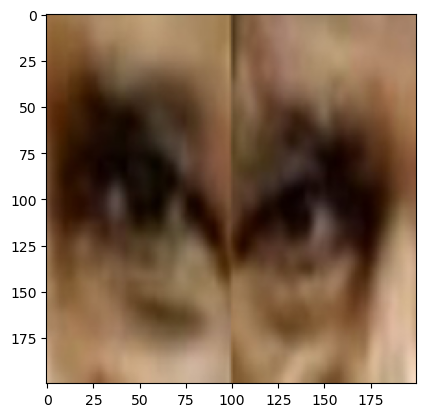

In [38]:
image = np.array(Image.open(r'C:\1eye\test\293.jpg').resize((200, 200)))
images_list = []
images_list.append(np.array(image))
x = np.asarray(images_list)
out=np.argmax(model_loaded.predict(x))
Ans=np.where(out==0, "Middle",(np.where(out==1,"old","young"))).item()
print(Ans+" age person.")
plt.imshow(image)
